# Brief Description

The purpose of this project is to conduct a 4 year forecast of The BRICS nations inflation. The Autoregression model will be implemented which uses observations from the previous time steps to predict the value of the next time steps.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
df_inflation_data = pd.read_csv('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_2917215.csv')
df_inflation_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.00000,1994.00000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0
4,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.21556,6.31108,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN


# Data Cleaning

In [3]:
#Extracting BRICS data from the dataframe
df_brazil_inflation = df_inflation_data.iloc[33]
df_russia_inflation = df_inflation_data.iloc[206]
df_india_inflation = df_inflation_data.iloc[113]
df_china_inflation = df_inflation_data.iloc[44]
df_sa_inflation = df_inflation_data.iloc[267]



In [4]:
#Checking the data structure, its a pandas series
print('Brazil' + str(type(df_brazil_inflation)))
print('Russia' + str(type(df_russia_inflation)))
print('India' + str(type(df_india_inflation)))
print('China' + str(type(df_china_inflation)))
print('South Africa' + str(type(df_sa_inflation)))

Brazil<class 'pandas.core.series.Series'>
Russia<class 'pandas.core.series.Series'>
India<class 'pandas.core.series.Series'>
China<class 'pandas.core.series.Series'>
South Africa<class 'pandas.core.series.Series'>


In [5]:
#converting series to dataframe
df_brazil_inflation_1 = pd.DataFrame(df_brazil_inflation)
df_russia_inflation_1 = pd.DataFrame(df_russia_inflation)
df_india_inflation_1 = pd.DataFrame(df_india_inflation)
df_china_inflation_1 = pd.DataFrame(df_china_inflation)
df_sa_inflation_1 = pd.DataFrame(df_sa_inflation)


In [6]:
#deleting Unncessary rows from dataframes
df_brazil_inflation_2 = df_brazil_inflation_1.drop(['Unnamed: 0', 
                                                    'Unnamed: 1', 
                                                    'Unnamed: 2', 
                                                    'Unnamed: 3'])

df_russia_inflation_2 = df_russia_inflation_1.drop(['Unnamed: 0', 
                                                    'Unnamed: 1', 
                                                    'Unnamed: 2', 
                                                    'Unnamed: 3'])

df_india_inflation_2 = df_india_inflation_1.drop(['Unnamed: 0', 
                                                  'Unnamed: 1', 
                                                  'Unnamed: 2', 
                                                  'Unnamed: 3'])

df_china_inflation_2 = df_china_inflation_1.drop(['Unnamed: 0', 
                                                  'Unnamed: 1', 
                                                  'Unnamed: 2', 
                                                  'Unnamed: 3'])

df_sa_inflation_2 = df_sa_inflation_1.drop(['Unnamed: 0', 
                                            'Unnamed: 1', 
                                            'Unnamed: 2', 
                                            'Unnamed: 3'])


In [7]:
#reindexing
df_brazil_inflation_3 = df_brazil_inflation_2.reset_index()
df_russia_inflation_3 = df_russia_inflation_2.reset_index()
df_india_inflation_3 = df_india_inflation_2.reset_index()
df_china_inflation_3 = df_china_inflation_2.reset_index()
df_sa_inflation_3 = df_sa_inflation_2.reset_index()


In [8]:
# adding a year column and delete the index column 
year_list = list(range(1960,2021))

df_brazil_inflation_3['Year'] = year_list

#renaming columns to inflation rate
df_brazil_inflation_3 = df_brazil_inflation_3.rename(columns = {33: 'Brazil Inflation Rate'})
df_russia_inflation_3 = df_russia_inflation_3.rename(columns = {206: 'Russia Inflation Rate'})
df_india_inflation_3 = df_india_inflation_3.rename(columns = {113: 'India Inflation Rate'})
df_china_inflation_3 = df_china_inflation_3.rename(columns = {44: 'China Inflation Rate'})
df_sa_inflation_3 = df_sa_inflation_3.rename(columns = {267: 'South Africa Inflation Rate'})

#droping index column
df_brazil_inflation_3 = df_brazil_inflation_3.drop('index', axis = 1)
df_russia_inflation_3 = df_russia_inflation_3.drop('index', axis = 1)
df_india_inflation_3 = df_india_inflation_3.drop('index', axis = 1)
df_china_inflation_3 = df_china_inflation_3.drop('index', axis = 1)
df_sa_inflation_3 = df_sa_inflation_3.drop('index', axis = 1)

#Merging the 5 dataframes into 1
df_inflation_final_merger = pd.concat([df_brazil_inflation_3, 
                                       df_russia_inflation_3, 
                                       df_india_inflation_3, 
                                       df_china_inflation_3,
                                       df_sa_inflation_3], axis = 1)

In [9]:
df_inflation_final_merger.head()

,Brazil Inflation Rate,Year,Russia Inflation Rate,India Inflation Rate,China Inflation Rate,South Africa Inflation Rate
0,NaN,1960,NaN,1.779878,NaN,1.288878
1,NaN,1961,NaN,1.695213,NaN,2.102343
2,NaN,1962,NaN,3.632215,NaN,1.24629
3,NaN,1963,NaN,2.946161,NaN,1.337968
4,NaN,1964,NaN,13.355261,NaN,2.53498


In [10]:
#rearranging the mergered dataframe columns
column_names = ['Year', 
                'Brazil Inflation Rate', 
                'Russia Inflation Rate', 
                'India Inflation Rate', 'China Inflation Rate', 
                'South Africa Inflation Rate']
df_inflation_final_merger = df_inflation_final_merger.reindex(columns = column_names)
df_inflation_final_merger.head()

,Year,Brazil Inflation Rate,Russia Inflation Rate,India Inflation Rate,China Inflation Rate,South Africa Inflation Rate
0,1960,NaN,NaN,1.779878,NaN,1.288878
1,1961,NaN,NaN,1.695213,NaN,2.102343
2,1962,NaN,NaN,3.632215,NaN,1.24629
3,1963,NaN,NaN,2.946161,NaN,1.337968
4,1964,NaN,NaN,13.355261,NaN,2.53498


# Visualisation of BRICS nations inflation time series

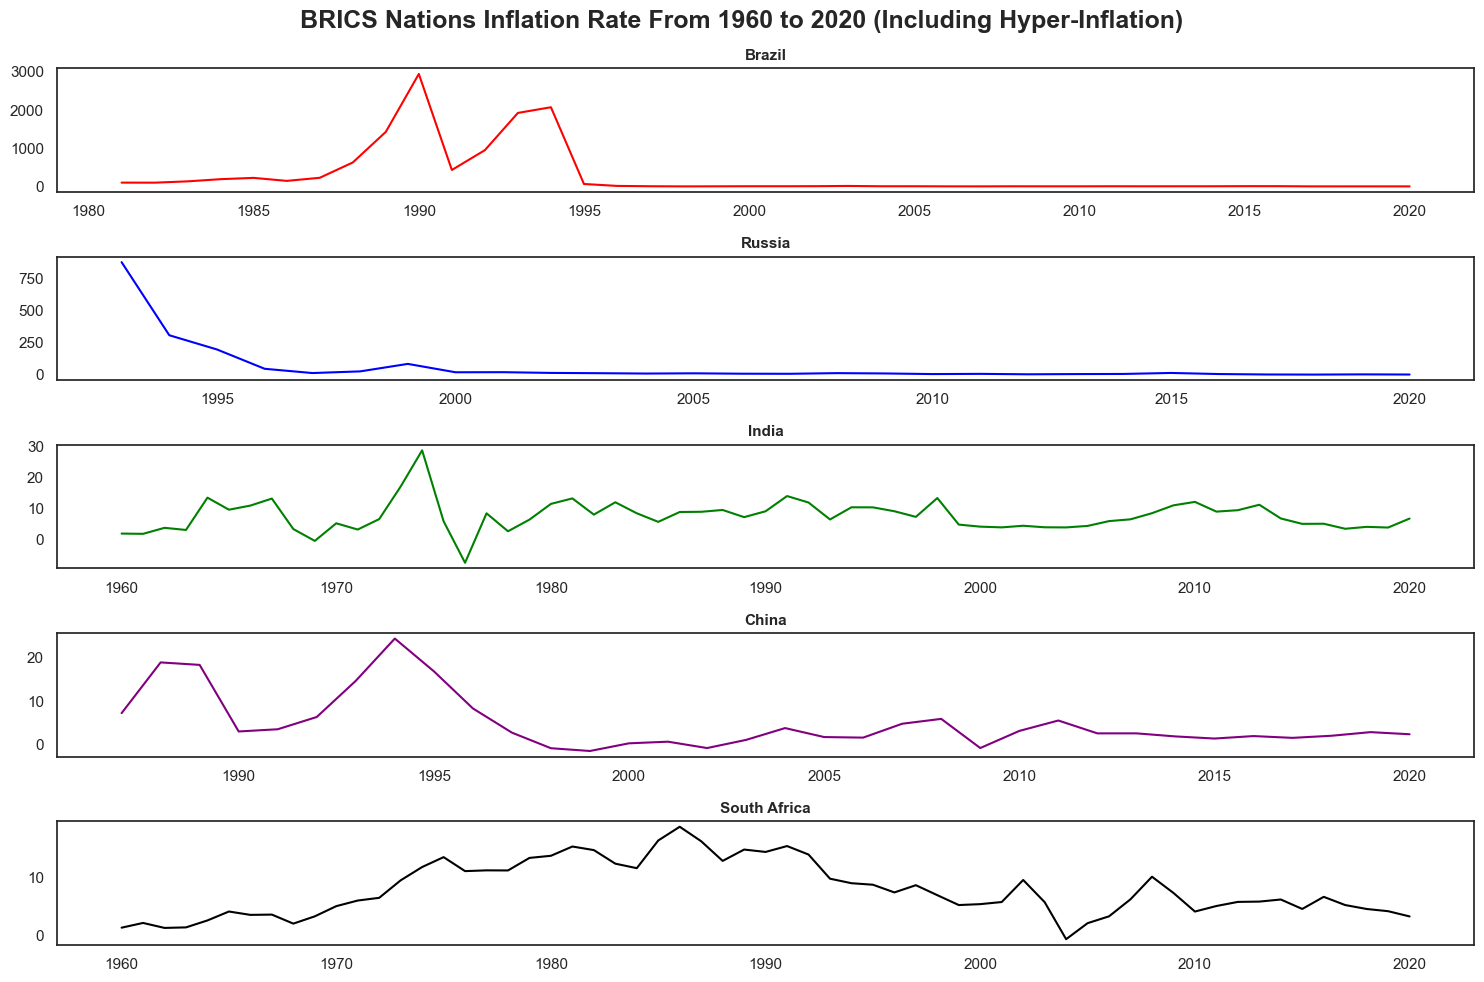

In [11]:
#Creating function for creating small multiples graphs to display time series of inflation of BRICS nations
def brics_inflation(data, main_title):

    fig, ax = plt.subplots(5)

    #Time series plot for Brazil
    ax[0].plot(data['Year'], 
              data['Brazil Inflation Rate'], 
              color = 'red')
    ax[0].set_title('Brazil', 
                   fontsize = 11, 
                   fontweight = 'bold')

    #Time series plot for Russia
    ax[1].plot(data['Year'], 
              data['Russia Inflation Rate'], 
              color = 'blue')
    ax[1].set_title('Russia',
                   fontsize = 11, 
                   fontweight = 'bold')

    #Time series plot for India
    ax[2].plot(data['Year'], 
              data['India Inflation Rate'], 
              color = 'green')
    ax[2].set_title('India', 
                   fontsize = 11,
                   fontweight = 'bold')

    #Time series plot for China
    ax[3].plot(data['Year'], 
              data['China Inflation Rate'],
              color = 'purple')
    ax[3].set_title('China', 
                   fontsize = 11, 
                   fontweight = 'bold')

    #Time series plot for South Africa
    ax[4].plot(data['Year'], 
              data['South Africa Inflation Rate'], 
              color = 'black')
    ax[4].set_title('South Africa', 
                   fontsize = 11,
                   fontweight = 'bold')

    plt.suptitle(main_title, 
             fontsize = 18, 
             fontweight = 'bold')

    plt.tight_layout()

    plt.show()
    
#calling function
brics_inflation(df_inflation_final_merger, 
                'BRICS Nations Inflation Rate From 1960 to 2020 (Including Hyper-Inflation)')


From the graphs above it is clear that Brazil and Russia had experienced periods of hyper-inflation during the early and mid 1990s. 

Therfore these are huge outliers in the data therefore to keep the forecast from being affected these outliers, they will be removed from the data, and all countries will start from 1996 to 2020.

In [12]:
#slicing the dataframe beacuse Brazil,Russia and China have missing data in the early years so will start the period 
#from 1996 to 2020. Starting from 1996 because it is post hyperinflation for a couple of the countries and I do not want
#those outliers affecting the calculations.
df_inflation_final_merger_2 = df_inflation_final_merger.iloc[36:]
df_inflation_final_merger_2.head()

df_inflation_final_merger_2.to_csv('BRICS Inflation Rates.csv')

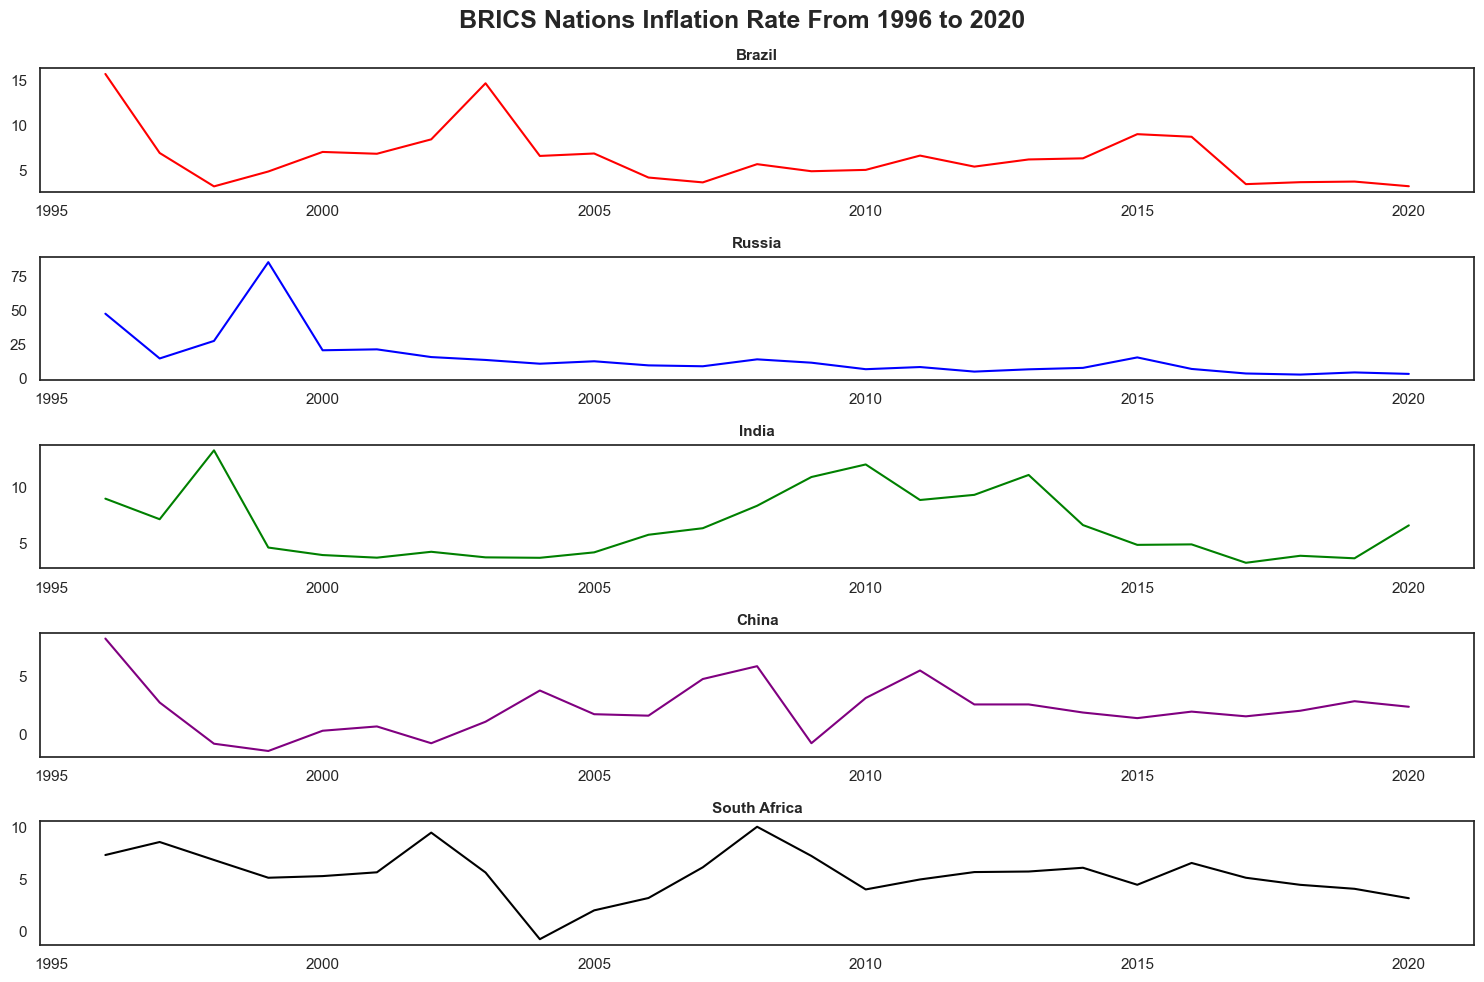

In [13]:
#calling function
brics_inflation(df_inflation_final_merger_2, 
                'BRICS Nations Inflation Rate From 1996 to 2020')

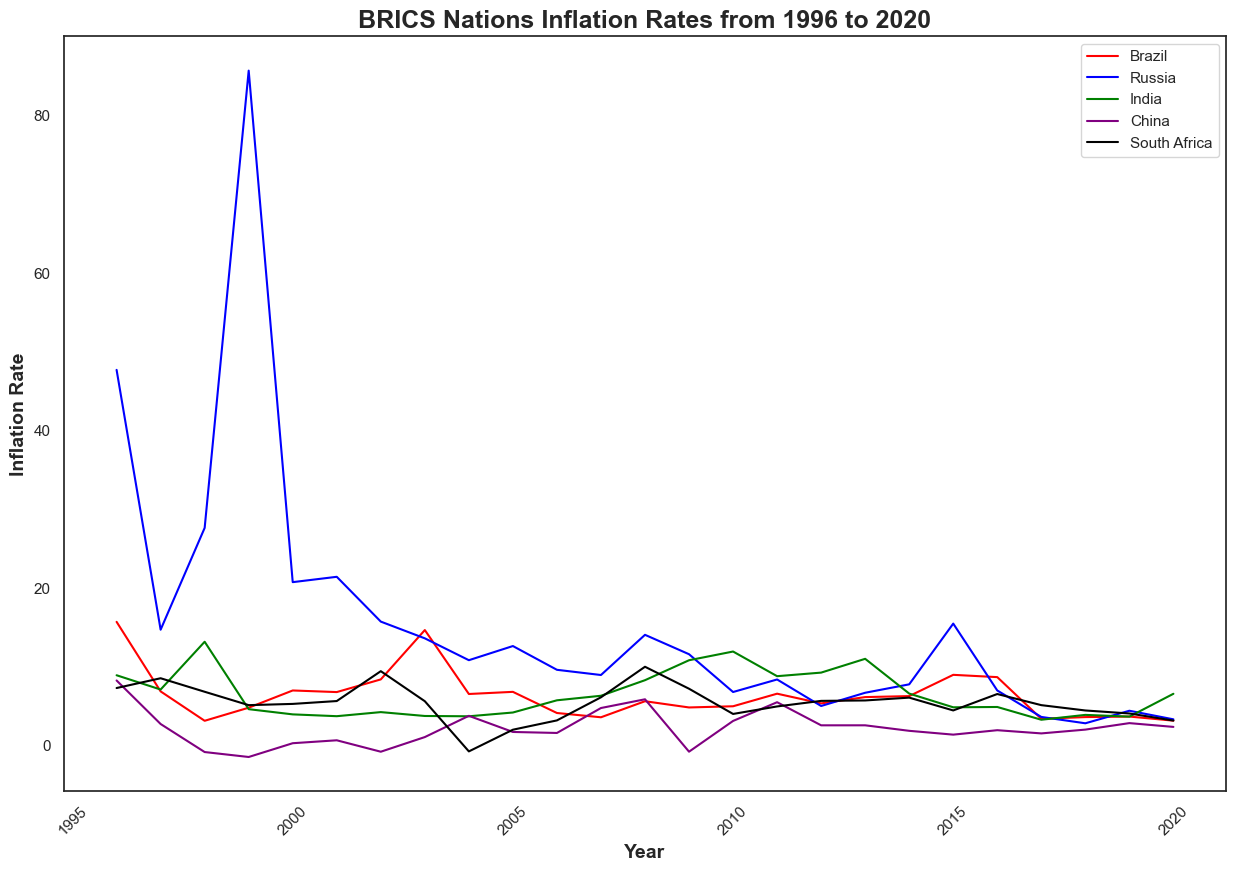

In [14]:
#Visualisation on one chart
ax = plt.axes()
ax.set_facecolor("white")
plt.plot('Year','Brazil Inflation Rate', 
         data = df_inflation_final_merger_2,
         color = 'red')

plt.plot('Year','Russia Inflation Rate', 
         data = df_inflation_final_merger_2, 
         color = 'blue')

plt.plot('Year','India Inflation Rate',
         data = df_inflation_final_merger_2, 
         color = 'green')

plt.plot('Year','China Inflation Rate', 
         data = df_inflation_final_merger_2, 
         color = 'purple')

plt.plot('Year','South Africa Inflation Rate',
         data = df_inflation_final_merger_2, 
         color = 'black')

plt.title('BRICS Nations Inflation Rates from 1996 to 2020',
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Year',
           fontsize = 14, 
           fontweight = 'bold')

plt.ylabel('Inflation Rate', 
           fontsize = 14, 
           fontweight = 'bold')

plt.legend(['Brazil', 'Russia', 'India', 'China', 'South Africa'])

plt.xticks(rotation = 45)

plt.show()

# Checking for Autocorrelation

Autocorrelation represents a relationship of a given time series and the lagged version over successive intervals. In essence its a correlation between two different time series.

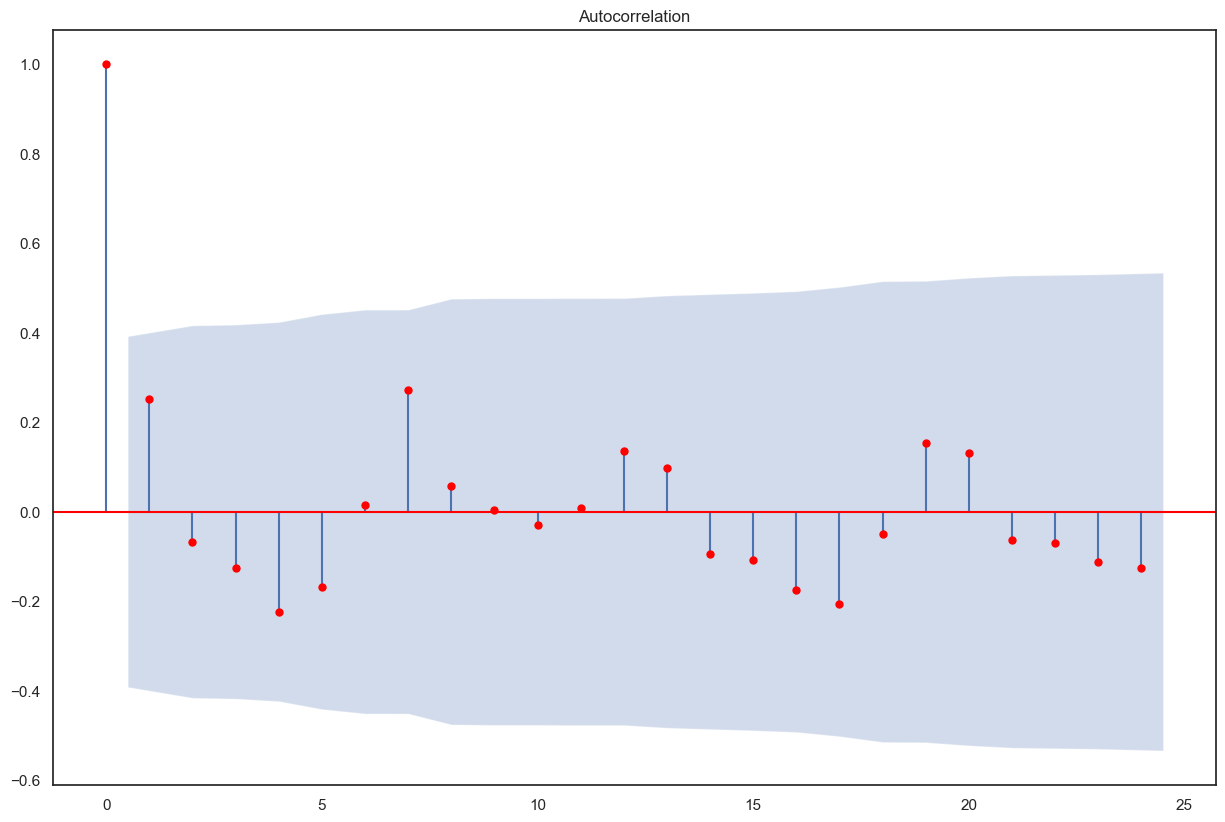

In [15]:
#Autocorrelation Brazil - Creating a function as i will reuse the same code for the other countries
def Auto_corr(inf_rate, color):
    sm.graphics.tsa.plot_acf(df_inflation_final_merger_2[inf_rate], 
                             lags = 24, 
                             color = color)
    plt.show()
    
    sm.tsa.acf(df_inflation_final_merger_2[inf_rate],
           nlags = 24, 
           fft = False)
    
Auto_corr('Brazil Inflation Rate', 'red')



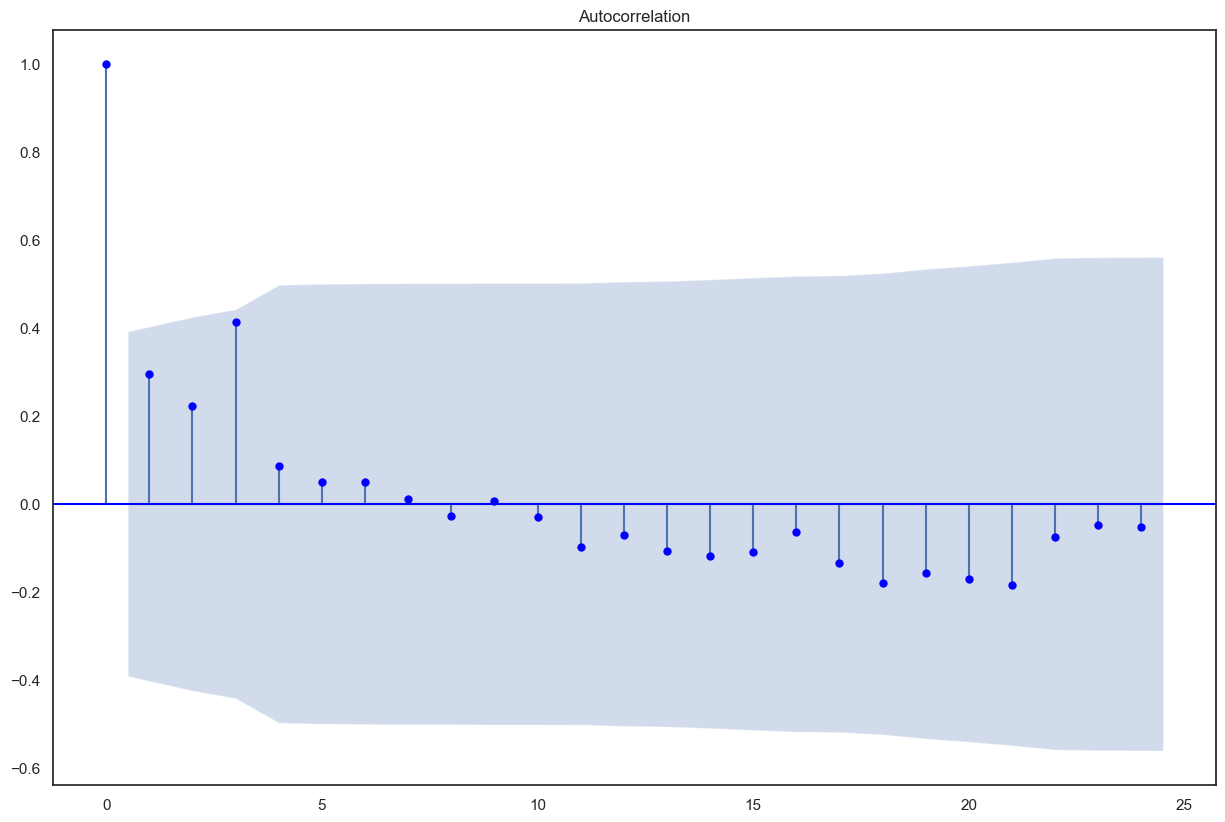

In [16]:
#Autocorrelation Russia
Auto_corr('Russia Inflation Rate', 'blue')

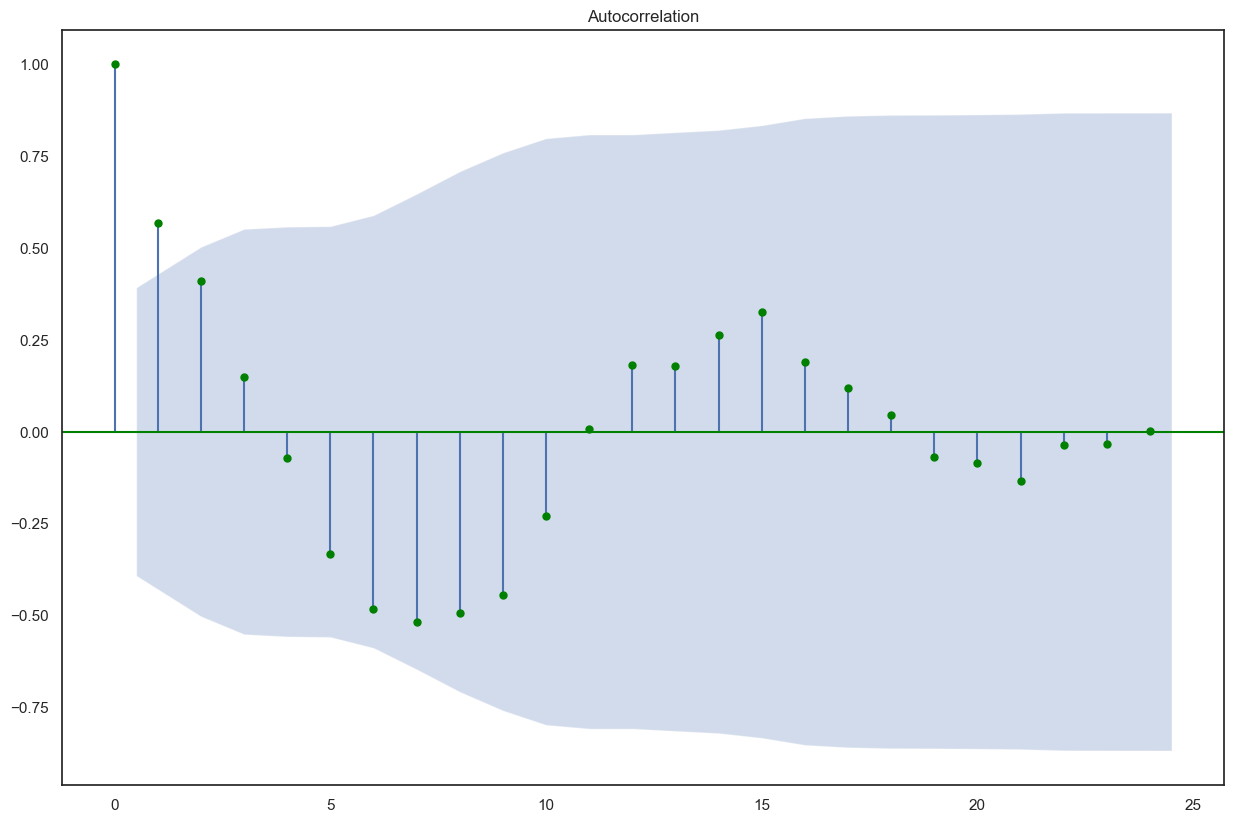

In [17]:
#Autocorrelation India
Auto_corr('India Inflation Rate', 'green')

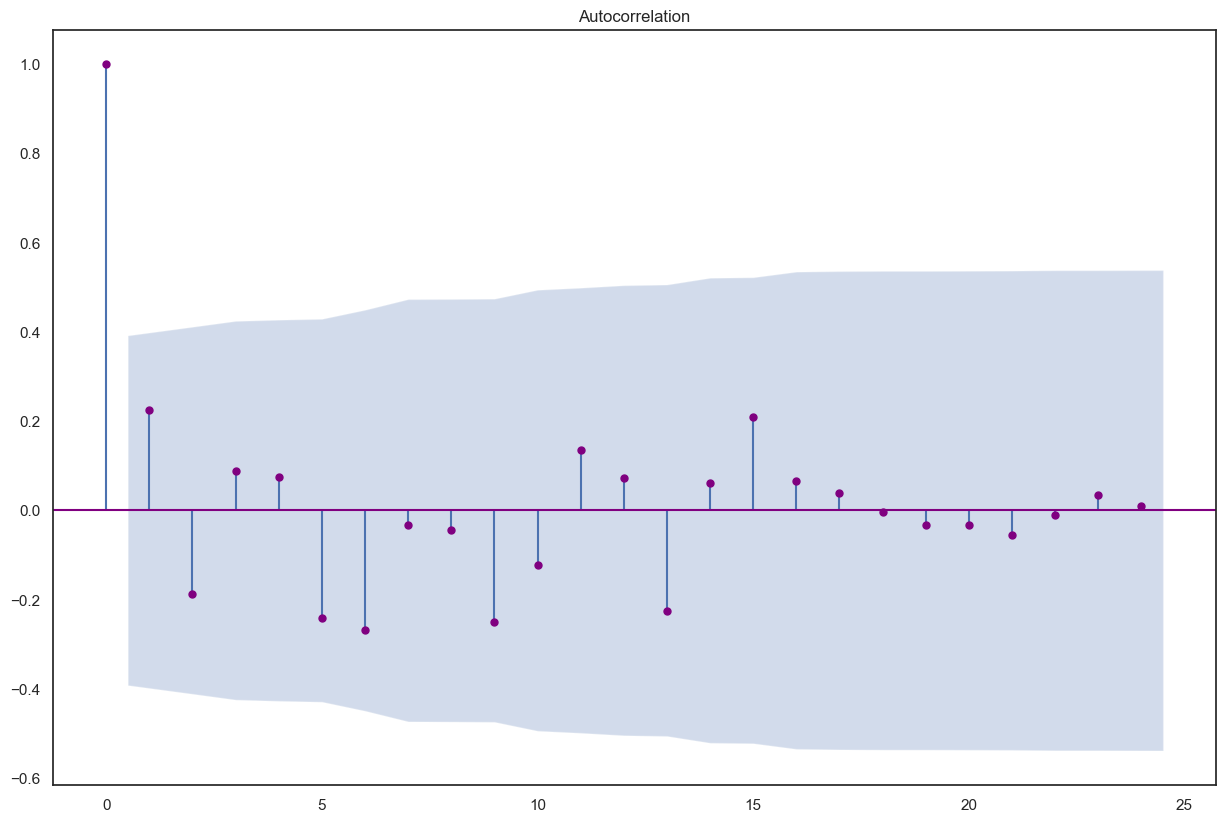

In [18]:
#Autocorrelation China
Auto_corr('China Inflation Rate', 'purple')

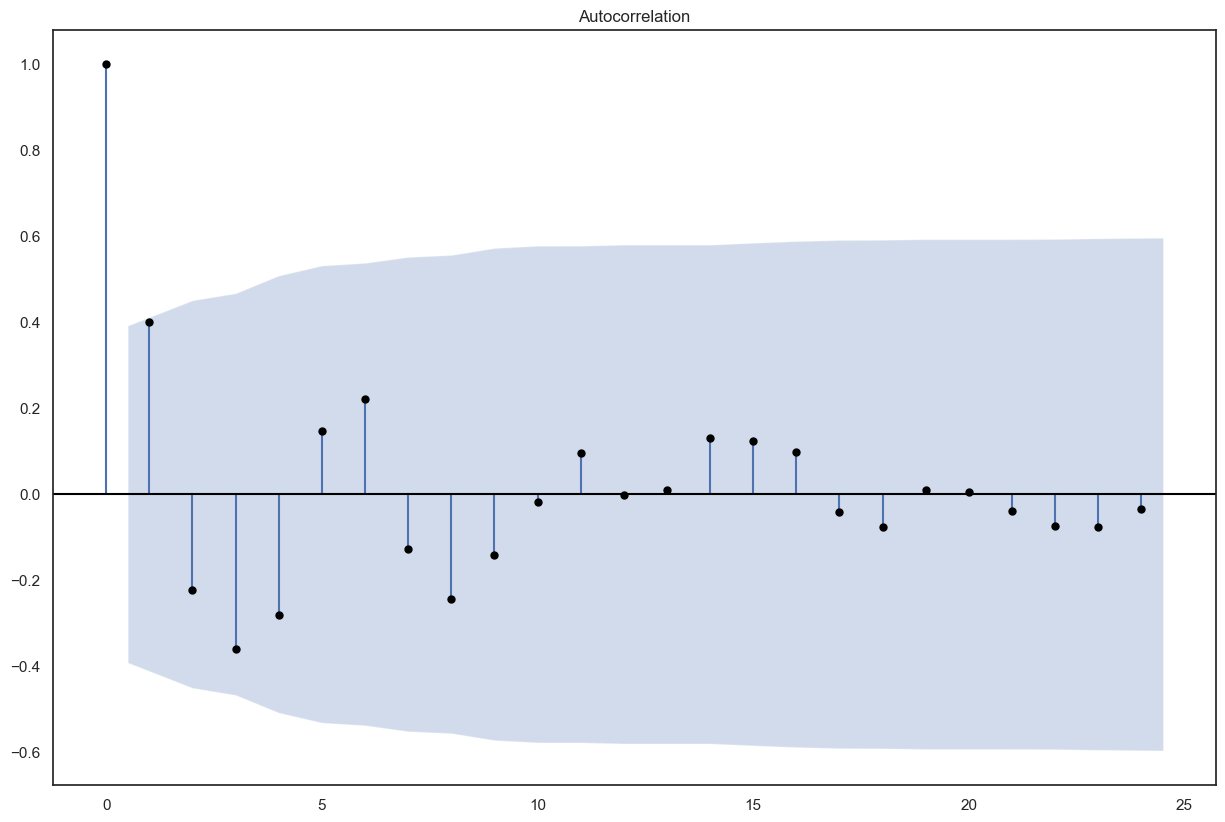

In [19]:
#Autocorrelation South Africa
Auto_corr('South Africa Inflation Rate', 'black')

From the visualisations shown above there is not a high correlation between the time series and the lagged series 

# Autoregression Model

This model uses observations from the previous time steps to predict the value of the next time steps. In other words we can predict the of the next time step (t+1) by observinf the last two time steps of (t-1) and (t-2).

Therefore regression model equation will be as follow:
x(t+1) = B0 + B1*x(t-1) + B2*x(t-2)

predicted=7.249183, expected=8.739144
predicted=7.160944, expected=3.446373
predicted=5.554698, expected=3.664850
predicted=5.621002, expected=3.732976
predicted=5.641676, expected=3.211768
Test RMSE: 2.411


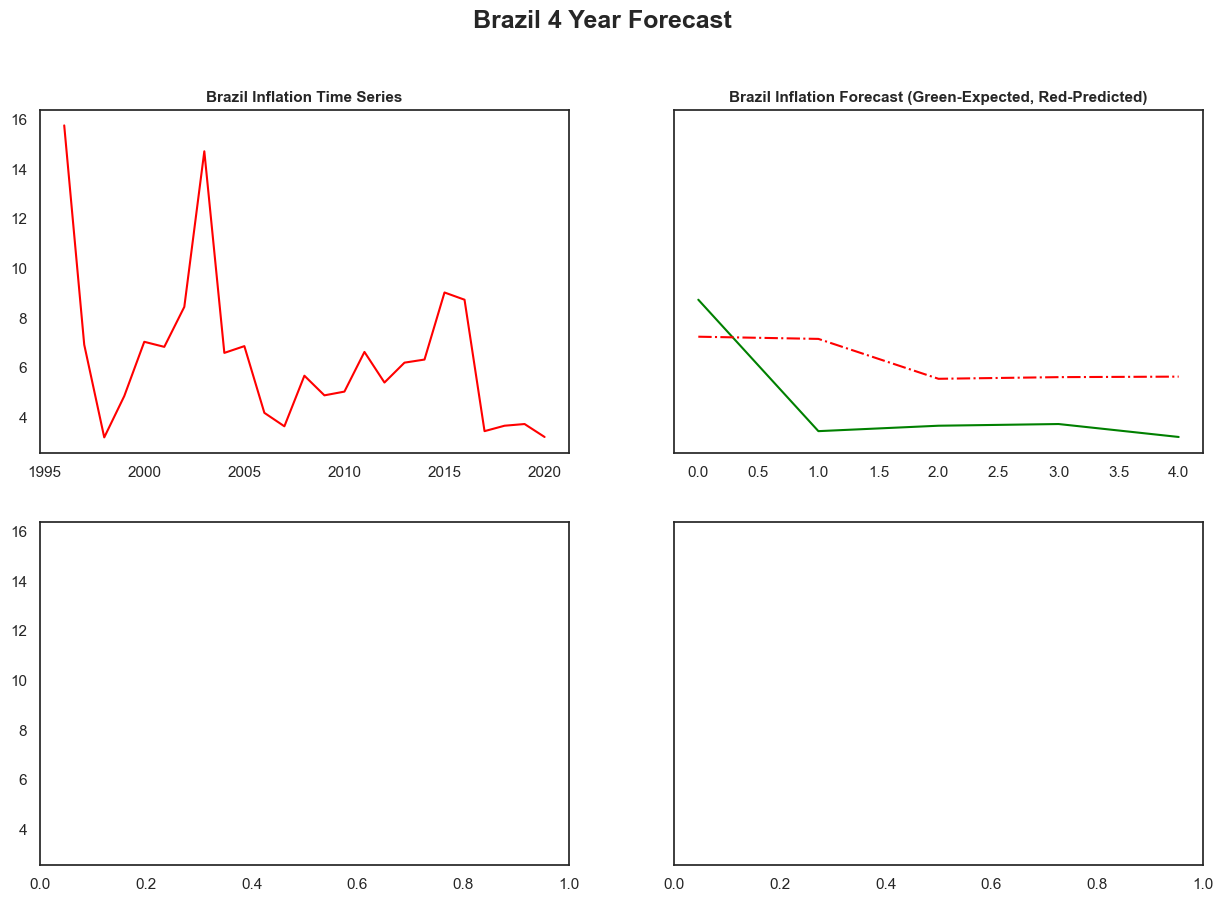

In [20]:
#creating a function for the auto regression process to forecast inflation and plot it on a line graph
def auto_regression(inf_rate, sub_title, forecast_title, main_title):
    Xbra = list(df_inflation_final_merger_2[inf_rate])
    train, test = Xbra[1:len(Xbra)-5], Xbra[len(Xbra)-5:]

    # train autoregression
    window = 1
    model = AutoReg(train, lags=1, old_names = False)
    model_fit = model.fit()
    coef = model_fit.params

    # walk forward over time steps in test
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)

    # line graph
    fig, ax = plt.subplots(2,2, sharey = True)

    ax[0, 0].plot(df_inflation_final_merger_2['Year'], 
              df_inflation_final_merger_2[inf_rate], 
              color = 'red')
    ax[0, 0].set_title(sub_title, 
                   fontsize = 11, 
                   fontweight = 'bold')

    ax[0, 1].plot(test, 
                  color = 'green')
    ax[0, 1].plot(predictions, 
                  color='red', 
                  linestyle = '-.')
    ax[0, 1].set_title(forecast_title, 
                   fontsize = 11, 
                   fontweight = 'bold')

    plt.suptitle(main_title, 
             fontsize = 18, 
             fontweight = 'bold')

    plt.show()
    
#calling function
auto_regression('Brazil Inflation Rate', 
                'Brazil Inflation Time Series', 
                'Brazil Inflation Forecast (Green-Expected, Red-Predicted)', 
                'Brazil 4 Year Forecast')

predicted=16.492519, expected=7.042448
predicted=14.016800, expected=3.683329
predicted=13.037494, expected=2.878297
predicted=12.802797, expected=4.470367
predicted=13.266944, expected=3.381659
Test RMSE: 9.659


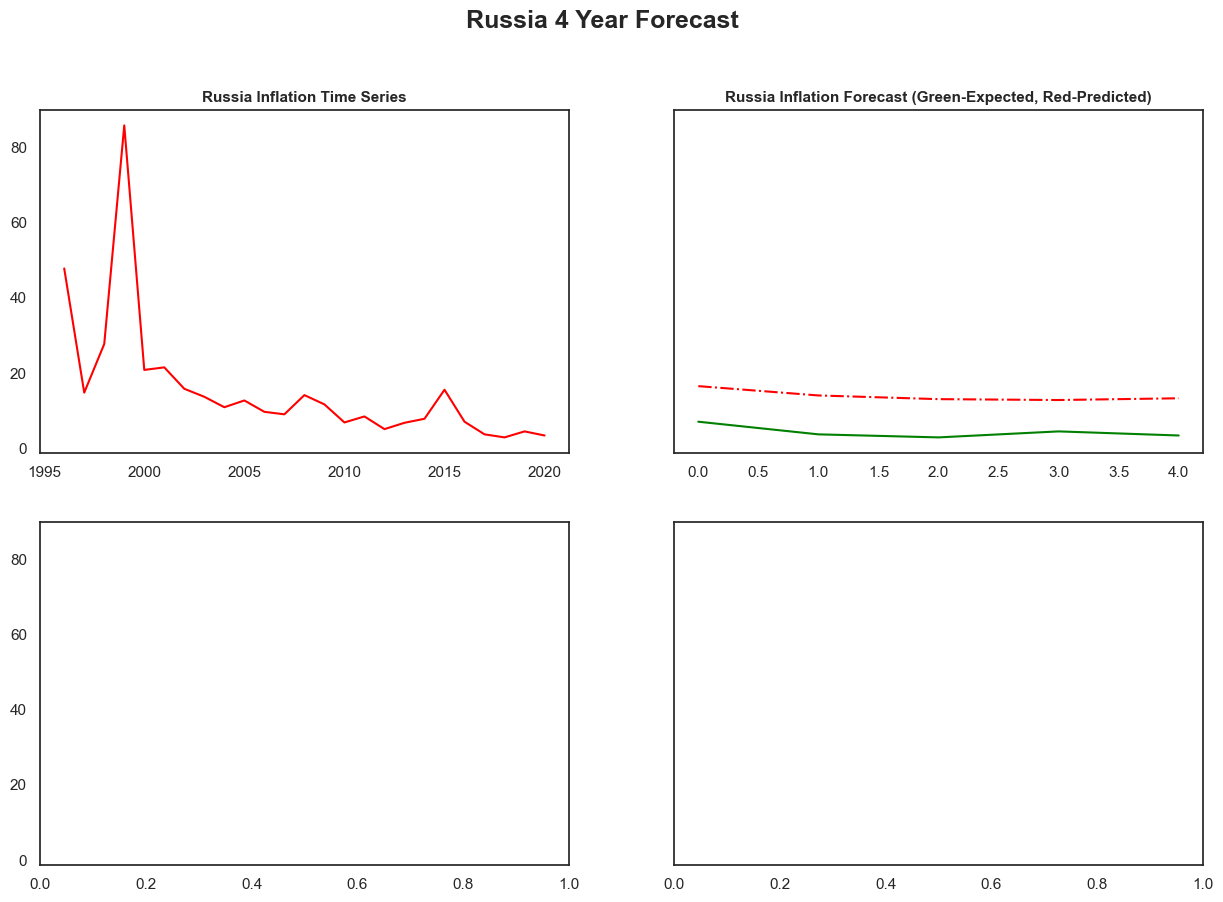

In [21]:
#Russia Forecast
auto_regression('Russia Inflation Rate', 
                'Russia Inflation Time Series', 
                'Russia Inflation Forecast (Green-Expected, Red-Predicted)', 
                'Russia 4 Year Forecast')

predicted=5.813601, expected=4.948216
predicted=5.835651, expected=3.328173
predicted=4.969504, expected=3.945069
predicted=5.299324, expected=3.723276
predicted=5.180743, expected=6.623437
Test RMSE: 1.591


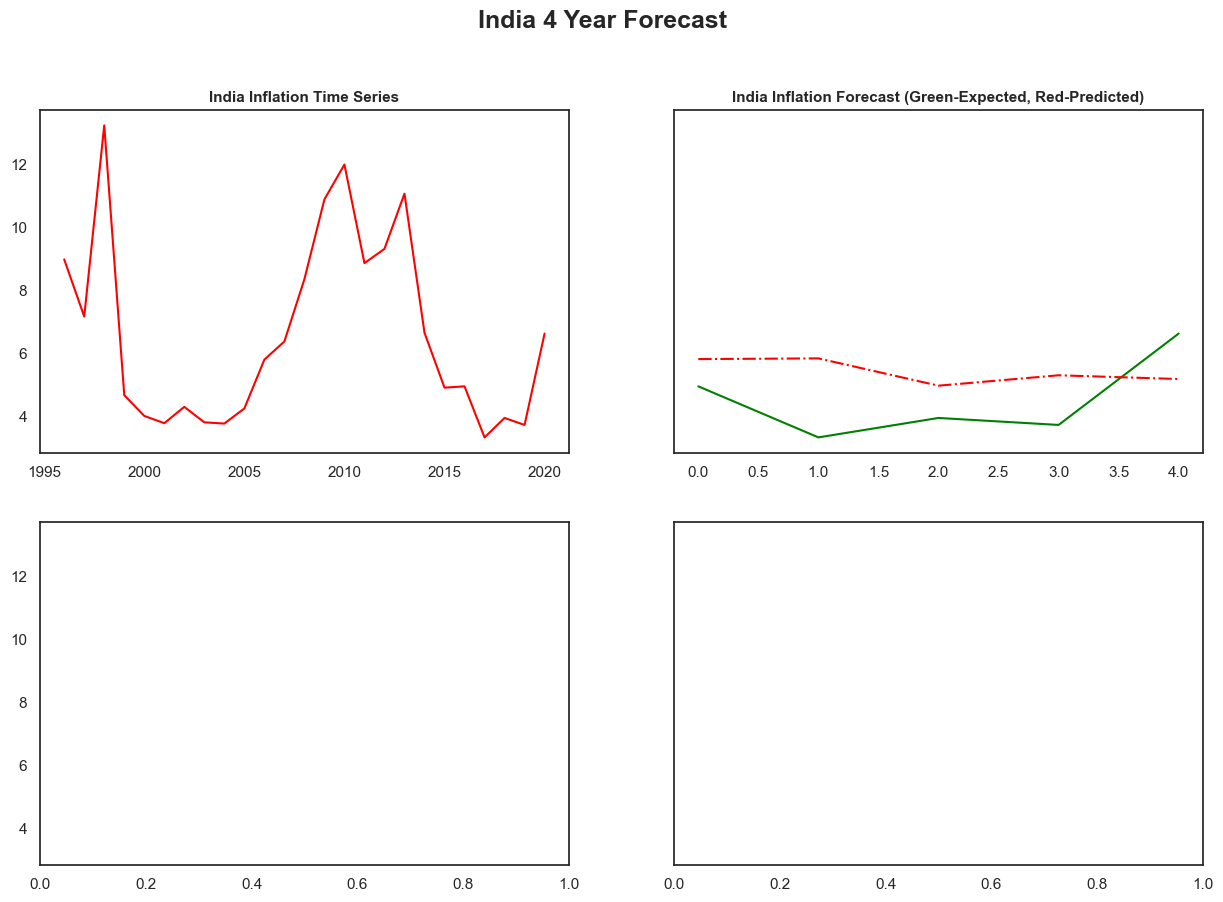

In [22]:
#India forecast
auto_regression('India Inflation Rate', 
                'India Inflation Time Series', 
                'India Inflation Forecast (Green-Expected, Red-Predicted)', 
                'India 4 Year Forecast')

predicted=1.743323, expected=2.000002
predicted=1.893685, expected=1.593136
predicted=1.785018, expected=2.074790
predicted=1.913660, expected=2.899234
predicted=2.133855, expected=2.419422
Test RMSE: 0.509


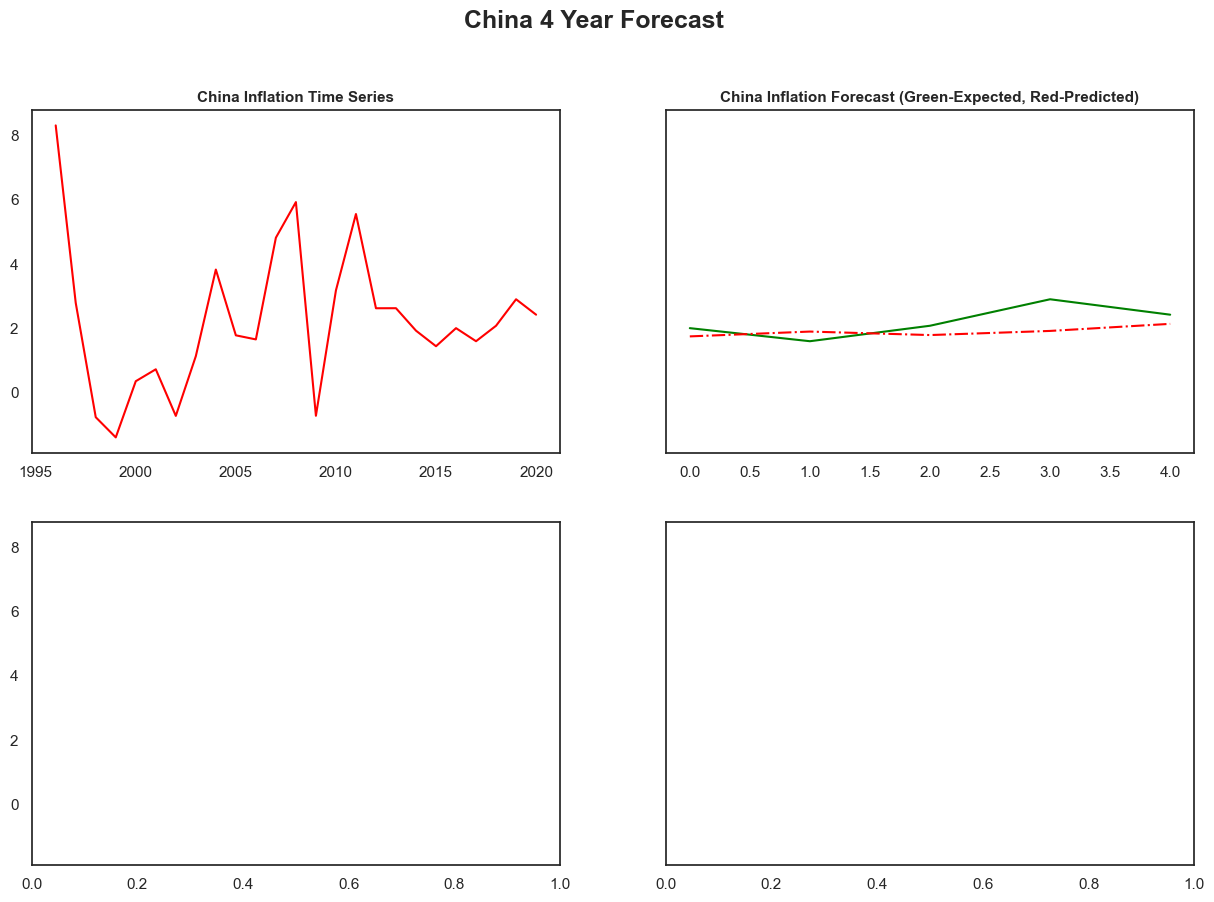

In [23]:
#China forecast
auto_regression('China Inflation Rate', 
                'China Inflation Time Series', 
                'China Inflation Forecast (Green-Expected, Red-Predicted)', 
                'China 4 Year Forecast')

predicted=4.998857, expected=6.594604
predicted=5.774211, expected=5.181082
predicted=5.248661, expected=4.504577
predicted=4.997136, expected=4.124351
predicted=4.855767, expected=3.223885
Test RMSE: 1.173


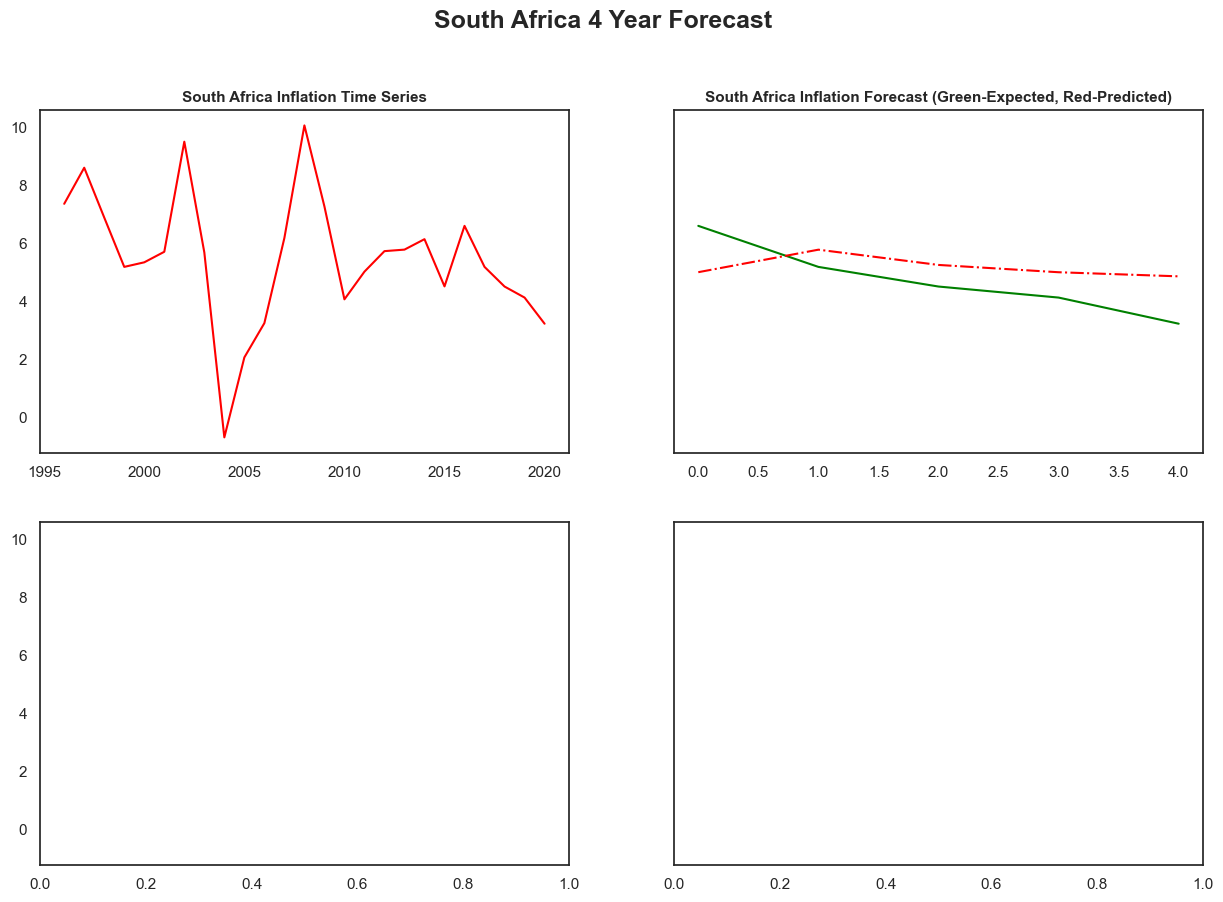

In [24]:
#South Africa forecast
auto_regression('South Africa Inflation Rate', 
                'South Africa Inflation Time Series', 
                'South Africa Inflation Forecast (Green-Expected, Red-Predicted)', 
                'South Africa 4 Year Forecast')